In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
playlist = pd.read_csv('data/PlayList.csv')
injuries = pd.read_csv('data/InjuryRecord.csv')

In [98]:
num_rows_playlist = playlist.shape[0]
print(num_rows_playlist)

num_rows_injuries = injuries.shape[0]
print(num_rows_injuries)

267005
105


DM_M1: One-hot encoding indicating 1 or more days missed due to injury
DM_M7: One-hot encoding indicating 7 or more days missed due to injury
DM_M28: One-hot encoding indicating 28 or more days missed due to injury
DM_M42: One-hot encoding indicating 42 or more days missed due to injury

In [90]:
# 1. Summarizing frequencies for DM_M1, DM_M7, DM_M28, and DM_M42
dm_stats = injuries[['DM_M1', 'DM_M7', 'DM_M28', 'DM_M42']].sum()
print("Total Count of Missed Days Due to Injuries:")
print(dm_stats)

Total Count of Missed Days Due to Injuries:
DM_M1     105
DM_M7      76
DM_M28     37
DM_M42     29
dtype: int64


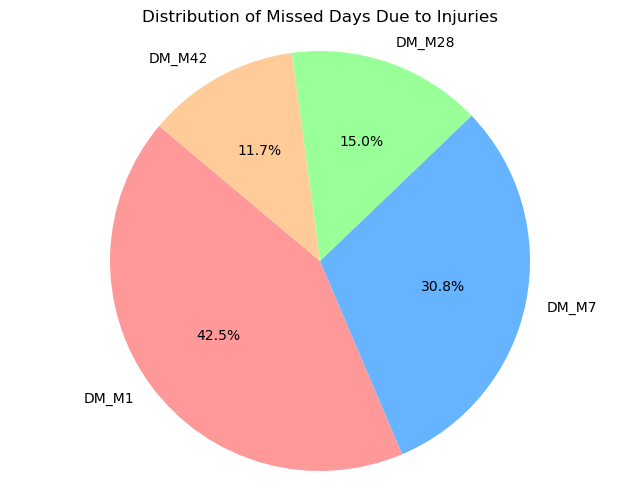

In [91]:
# Creating the pie chart
labels = dm_stats.index
sizes = dm_stats.values
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  # Custom colors
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Missed Days Due to Injuries')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

Temperature: 

In [92]:
numerical_attributes = ['Temperature']
statistics = playlist[numerical_attributes].describe()
print("Basic Statistics:\n", statistics)

Basic Statistics:
          Temperature
count  267005.000000
mean      -35.029535
std       304.583110
min      -999.000000
25%        44.000000
50%        61.000000
75%        72.000000
max        97.000000


In [93]:
total_rows = len(playlist)  # Get the total number of rows
error_count = (playlist['Temperature'] == -999).sum()  # Count how many -999 values are in the Temperature column

print(f"Total Rows: {total_rows}")
print(f"Count of -999 in Temperature: {error_count}")

Total Rows: 267005
Count of -999 in Temperature: 24170


In [94]:
# Filter out rows where Temperature is -999
filtered_playlist = playlist[playlist['Temperature'] != -999]

# Calculate basic statistics for the filtered data
numerical_attributes = ['Temperature']
statistics = filtered_playlist[numerical_attributes].describe()

print("Basic Statistics (excluding -999 values):\n", statistics)


Basic Statistics (excluding -999 values):
          Temperature
count  242835.000000
mean       60.916956
std        17.575653
min         9.000000
25%        48.000000
50%        62.000000
75%        74.000000
max        97.000000


Frequence of play, field, injuries

In [95]:
df_filtered_injury_details = playlist[playlist['PlayType'] != '0']
df_filtered_injury_details = pd.merge(df_filtered_injury_details, injuries, on=['PlayerKey', 'GameID', 'PlayKey'], how='right')
print(df_filtered_injury_details.head())
print(df_filtered_injury_details.columns)

   PlayerKey   GameID     PlayKey RosterPosition  PlayerDay  PlayerGame  \
0      39873  39873-4  39873-4-32     Linebacker       29.0         4.0   
1      46074  46074-7  46074-7-26     Linebacker       50.0         7.0   
2      36557  36557-1  36557-1-70         Safety        1.0         1.0   
3      46646  46646-3  46646-3-30     Linebacker       15.0         3.0   
4      43532  43532-5  43532-5-69  Wide Receiver       32.0         5.0   

        StadiumType  FieldType  Temperature         Weather PlayType  \
0           Indoors  Synthetic         84.0          Cloudy     Punt   
1              Open    Natural         76.0   Partly Cloudy     Punt   
2           Outdoor  Synthetic         63.0  Clear and warm     Pass   
3           Outdoor    Natural         80.0          Cloudy     Punt   
4  Retractable Roof  Synthetic         89.0   Partly Cloudy  Kickoff   

   PlayerGamePlay Position PositionGroup BodyPart    Surface  DM_M1  DM_M7  \
0            32.0      OLB            

In [62]:
# Method 1: Using shape attribute
num_rows = df_filtered_injury_details.shape[0]
print(f"Number of rows in df_injury_details: {num_rows}")

Number of rows in df_injury_details: 105


In [67]:

# Frequency of plays (PlayType), field types (FieldType), and injuries (BodyPart)
play_type_frequency = df_filtered_injury_details['PlayType'].value_counts()
field_type_frequency = df_filtered_injury_details['FieldType'].value_counts()
body_part_frequency = df_filtered_injury_details['BodyPart'].value_counts()
roster_position_frequency = df_filtered_injury_details['RosterPosition'].value_counts()

print("\nPlayType Frequency Distribution:\n", play_type_frequency)
print("\nFieldType Frequency Distribution:\n", field_type_frequency)
print("\nBodyPart Frequency Distribution:\n", body_part_frequency)
print("\nRosterPosition Frequency Distribution:\n", roster_position_frequency)



PlayType Frequency Distribution:
 PlayType
Pass                    32
Rush                    23
Punt                     9
Kickoff                  7
Punt Returned            3
Punt Not Returned        1
Kickoff Returned         1
Kickoff Not Returned     1
Name: count, dtype: int64

FieldType Frequency Distribution:
 FieldType
Synthetic    41
Natural      36
Name: count, dtype: int64

BodyPart Frequency Distribution:
 BodyPart
Knee     48
Ankle    42
Foot      7
Toes      7
Heel      1
Name: count, dtype: int64

RosterPosition Frequency Distribution:
 RosterPosition
Linebacker           21
Wide Receiver        16
Safety               11
Cornerback            8
Defensive Lineman     7
Running Back          6
Offensive Lineman     6
Tight End             2
Name: count, dtype: int64


/var/folders/b2/0jnp196543qfsgdbvzhy42pr0000gn/T/ipykernel_63989/2964644709.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered_injury_details, x='PlayType', palette='coolwarm')


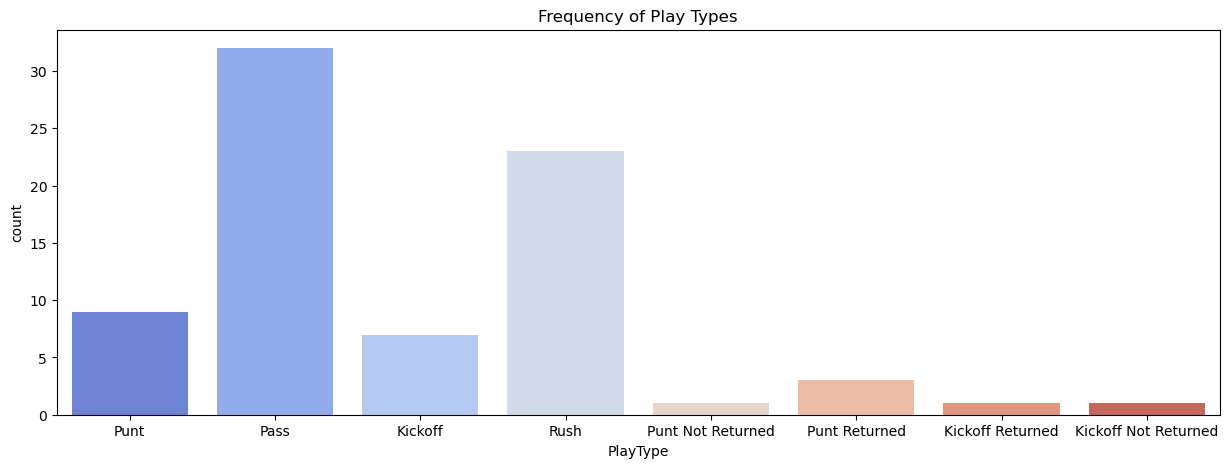

/var/folders/b2/0jnp196543qfsgdbvzhy42pr0000gn/T/ipykernel_63989/2964644709.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered_injury_details, x='FieldType', palette='viridis')


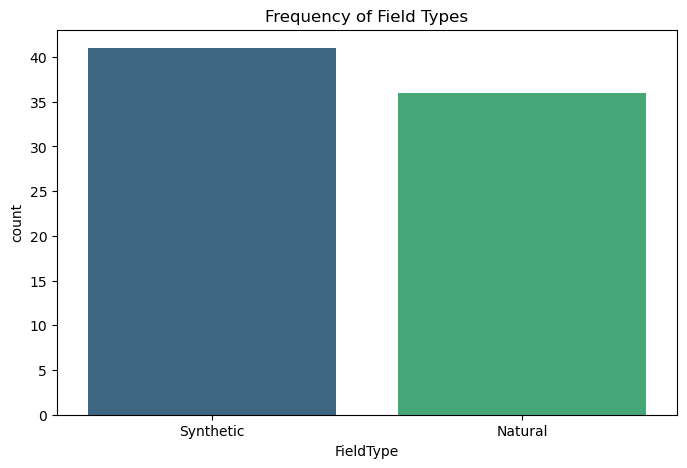

/var/folders/b2/0jnp196543qfsgdbvzhy42pr0000gn/T/ipykernel_63989/2964644709.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered_injury_details, x='BodyPart', palette='magma')


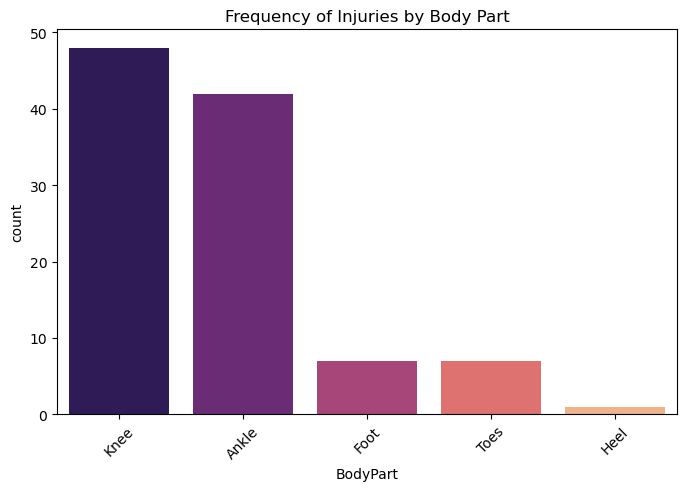

/var/folders/b2/0jnp196543qfsgdbvzhy42pr0000gn/T/ipykernel_63989/2964644709.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered_injury_details, x='RosterPosition', palette='magma')


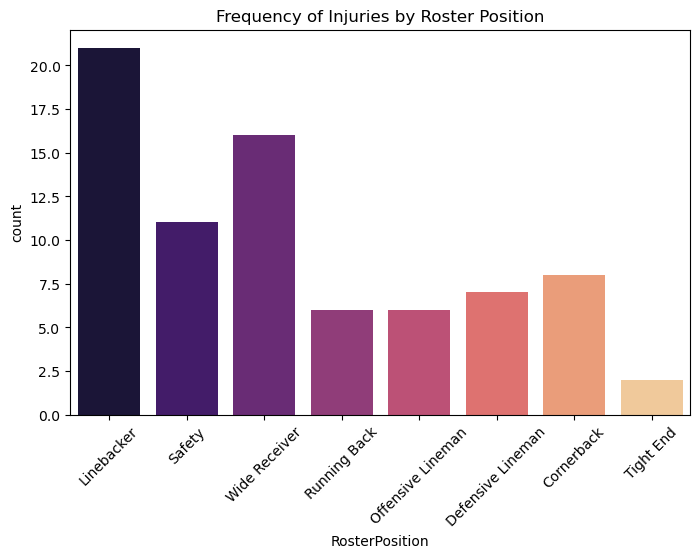

In [68]:
#Frequency Distribution: Visualizing PlayType, FieldType, and BodyPart
# Bar plot for PlayType frequency distribution
plt.figure(figsize=(15, 5))  # Increase the width to 12
sns.countplot(data=df_filtered_injury_details, x='PlayType', palette='coolwarm')
plt.title('Frequency of Play Types')
plt.show()

# Bar plot for FieldType frequency distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtered_injury_details, x='FieldType', palette='viridis')
plt.title('Frequency of Field Types')
plt.show()

# Bar plot for BodyPart (injuries) frequency distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtered_injury_details, x='BodyPart', palette='magma')
plt.title('Frequency of Injuries by Body Part')
plt.xticks(rotation=45)
plt.show()

# Bar plot for RosterPosition frequency distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtered_injury_details, x='RosterPosition', palette='magma')
plt.title('Frequency of Injuries by Roster Position')
plt.xticks(rotation=45)
plt.show()

GROUP BY ON GRASS 

In [69]:
# Grouping the data by FieldType and BodyPart to get the frequency of injuries
injury_distribution = df_filtered_injury_details.groupby(['FieldType', 'BodyPart']).size().reset_index(name='Count')
print(injury_distribution)

   FieldType BodyPart  Count
0    Natural    Ankle     14
1    Natural     Foot      4
2    Natural     Knee     18
3  Synthetic    Ankle     21
4  Synthetic     Foot      2
5  Synthetic     Knee     18


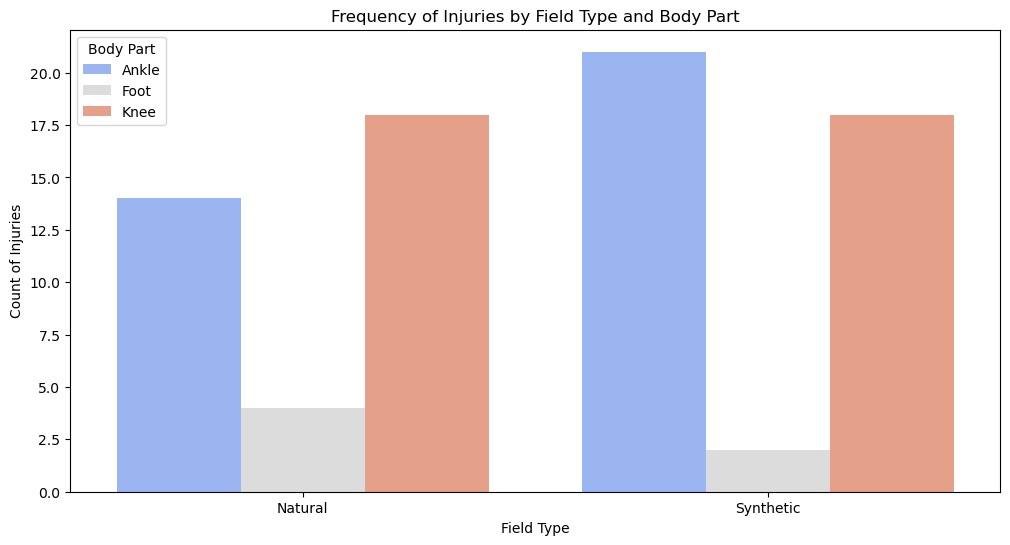

In [72]:
# Create a bar plot for all injuries by field type and body part
plt.figure(figsize=(12, 6))
sns.barplot(data=injury_distribution, 
            x='FieldType', 
            y='Count', 
            hue='BodyPart', 
            palette='coolwarm')

plt.title('Frequency of Injuries by Field Type and Body Part')
plt.xlabel('Field Type')
plt.ylabel('Count of Injuries')
plt.legend(title='Body Part')
plt.show()

LINE GRAPHS FOR MISSED DAYS

In [73]:
# 3. Cross-analysis: Injuries by Body Part leading to missed days
dm_bodypart = df_filtered_injury_details.groupby('BodyPart')[['DM_M1', 'DM_M7', 'DM_M28', 'DM_M42']].sum()
print("\nMissed Days by Body Part:")
print(dm_bodypart)

# Cross-analysis: Injuries by FieldType leading to missed days
dm_fieldtype = df_filtered_injury_details.groupby('FieldType')[['DM_M1', 'DM_M7', 'DM_M28', 'DM_M42']].sum()
print("\nMissed Days by Field Type:")
print(dm_fieldtype)

# Cross-analysis: Injuries by Weather leading to missed days
dm_weather = df_filtered_injury_details.groupby('Weather')[['DM_M1', 'DM_M7', 'DM_M28', 'DM_M42']].sum()
print("\nMissed Days by Weather Condition:")
print(dm_weather)


Missed Days by Body Part:
          DM_M1  DM_M7  DM_M28  DM_M42
BodyPart                              
Ankle        42     26      13      11
Foot          7      7       7       5
Heel          1      1       0       0
Knee         48     37      16      13
Toes          7      5       1       0

Missed Days by Field Type:
           DM_M1  DM_M7  DM_M28  DM_M42
FieldType                              
Natural       36     27      11       9
Synthetic     41     33      20      15

Missed Days by Weather Condition:
                                                    DM_M1  DM_M7  DM_M28  \
Weather                                                                    
Clear                                                   7      7       2   
Clear Skies                                             1      0       0   
Clear and warm                                          1      1       1   
Clear skies                                             2      2       1   
Cloudy               

<Figure size 1000x600 with 0 Axes>

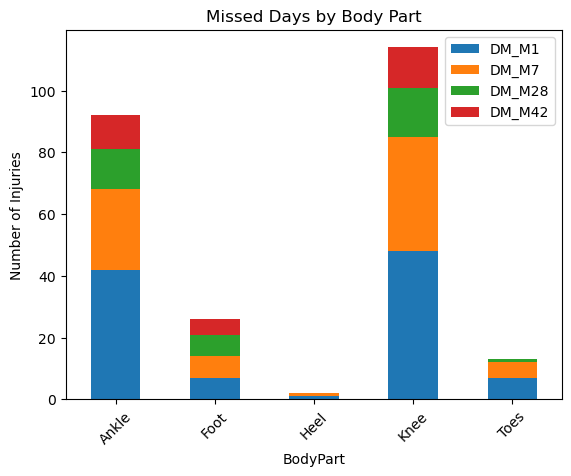

In [75]:
# Plotting Missed Days by Body Part
plt.figure(figsize=(10, 6))
dm_bodypart.plot(kind='bar', stacked=True)
plt.title('Missed Days by Body Part')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.show()

DATA VERIFICATION

In [ ]:
# df_filtered_injury_details main table 

In [96]:
df_filtered_injury_details.head()


,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Linebacker,29.0,4.0,Indoors,Synthetic,84.0,Cloudy,Punt,32.0,OLB,LB,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Linebacker,50.0,7.0,Open,Natural,76.0,Partly Cloudy,Punt,26.0,OLB,LB,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Safety,1.0,1.0,Outdoor,Synthetic,63.0,Clear and warm,Pass,70.0,SS,DB,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Linebacker,15.0,3.0,Outdoor,Natural,80.0,Cloudy,Punt,30.0,LB,LB,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Wide Receiver,32.0,5.0,Retractable Roof,Synthetic,89.0,Partly Cloudy,Kickoff,69.0,WR,WR,Ankle,Synthetic,1,1,1,1


In [97]:
num_rows = df_filtered_injury_details.shape[0]
print(num_rows)

105


In [100]:
df_filtered_injury_details = df_filtered_injury_details[df_filtered_injury_details['Temperature'] != -999]
numerical_attributes = ['Temperature']
statistics = df_filtered_injury_details[numerical_attributes].describe()
print("Basic Statistics:\n", statistics)

Basic Statistics:
        Temperature
count    70.000000
mean     65.371429
std      15.269721
min      33.000000
25%      55.000000
50%      68.000000
75%      76.000000
max      89.000000


In [104]:
num_rows = df_filtered_injury_details.shape[0]
print(num_rows)


98


In [106]:
df_filtered_injury_details = df_filtered_injury_details[df_filtered_injury_details['PlayType'] != '0']
num_rows = df_filtered_injury_details.shape[0]
print(num_rows)
play_type_frequency = df_filtered_injury_details['PlayType'].value_counts()

print("\nPlayType Frequency Distribution:\n", play_type_frequency)

98

PlayType Frequency Distribution:
 PlayType
Pass                    28
Rush                    20
Punt                     9
Kickoff                  7
Punt Returned            3
Punt Not Returned        1
Kickoff Returned         1
Kickoff Not Returned     1
Name: count, dtype: int64


exploreatory: 

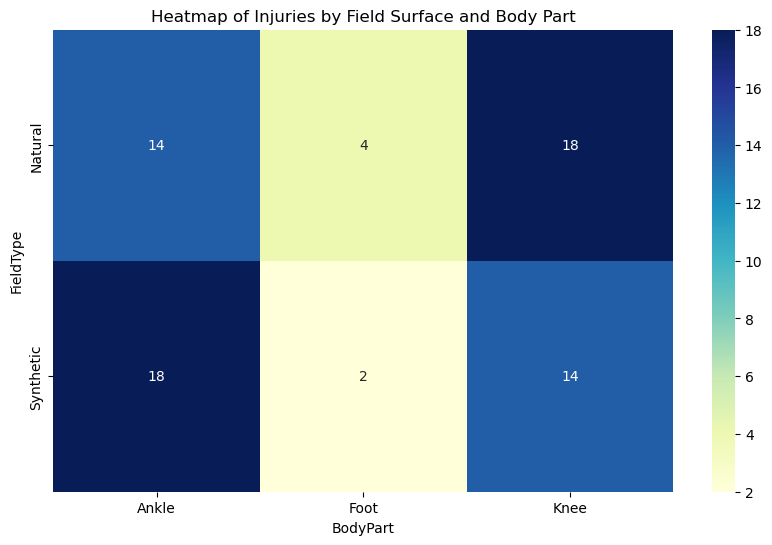

In [107]:
# 3. Subpopulation Analysis by Field Surface and Body Part
# Create a heatmap showing the count of injuries by FieldType and BodyPart
pivot_surface_injuries = df_filtered_injury_details.pivot_table(index='FieldType', columns='BodyPart', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_surface_injuries, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Injuries by Field Surface and Body Part')
plt.show()

In [108]:
print(df_filtered_injury_details.dtypes) 

PlayerKey           int64
GameID             object
PlayKey            object
RosterPosition     object
PlayerDay         float64
PlayerGame        float64
StadiumType        object
FieldType          object
Temperature       float64
Weather            object
PlayType           object
PlayerGamePlay    float64
Position           object
PositionGroup      object
BodyPart           object
Surface            object
DM_M1               int64
DM_M7               int64
DM_M28              int64
DM_M42              int64
dtype: object


In [110]:
unrealistic_temps = df_filtered_injury_details[df_filtered_injury_details['Temperature'] < -273.15]
print(unrealistic_temps)

Empty DataFrame
Columns: [PlayerKey, GameID, PlayKey, RosterPosition, PlayerDay, PlayerGame, StadiumType, FieldType, Temperature, Weather, PlayType, PlayerGamePlay, Position, PositionGroup, BodyPart, Surface, DM_M1, DM_M7, DM_M28, DM_M42]
Index: []


In [114]:
duplicates = injuries[injuries.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [PlayerKey, GameID, PlayKey, BodyPart, Surface, DM_M1, DM_M7, DM_M28, DM_M42]
Index: []


In [117]:
missing_values = df_filtered_injury_details.isnull().sum()
print(missing_values)

PlayerKey          0
GameID             0
PlayKey           28
RosterPosition    28
PlayerDay         28
PlayerGame        28
StadiumType       32
FieldType         28
Temperature       28
Weather           29
PlayType          28
PlayerGamePlay    28
Position          28
PositionGroup     28
BodyPart           0
Surface            0
DM_M1              0
DM_M7              0
DM_M28             0
DM_M42             0
dtype: int64
